# The Word Factory

In [1]:
import string
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

![](imgs/img1.png)
![](imgs/img2.png)
![](imgs/img3.png)

In [2]:
inventory_management_cost = 1_000
successfully_completed_order = 20_000
contractual_penalty = 10_000
express_order_cost = 3_000

In [3]:
words = ['Reflexly','Unageing','Vinegary','Dotation','Spoonful','Dingiest','Haftarah',
         'Mistreat','Monocyte','Tamarind','Blamably','Outliner','Whelping','Braunite',
         'Oppilant','Hereaway','Axillary','Squalene','Winterer','Balladry','Shoepacs',
         'Enviably','Subbreed','Ustulate','Jiujitsu','Trolling','Haematal','Keeshond',
         'Examples','Spritzes','Geraniol','Corvette','Delation','Gheraoes','Satiable',
         'Serosity','Provided','Minatory','Overcram','Reaginic','Liveners','Culprits',
         'Affixial','Resinoid','Seascape','Starving','Whinnier','Chomping','Bookings',
         'Sclerite','Yummiest','Authored','Alarming','Dinkiest','Laryngeal','Boulders', #Laryngeal has 9 letters
         'Sorcerer','Forefeel','Outspell','Curtalax','Misusage','Doupioni','Slinking',
         'Rehinges','Loudness','Labrusca','Beeyards','Branches','Peytrels','Engineer',
         'Arsenite','Effecter','Etouffee','Bradawls','Zoospore','Morrises','Articled',
         'Hommocks','Tankages','Pennated','Floatels','Pumpkins','Choreoid','Espouser',
         'Sweetsop','Sandbank','Pokiness','Canaries','Aglycone','Unrusted','Gripsack',
         'Siluroid','Effected','Druggier','Abapical','Offprint','Posttest','Eviction',
         'Goitrous','Psephite','Emotions','Fleering','Avowably','Mannitol','Urethans']

In [4]:
words = [word.lower() for word in words]

letter_counter = {}
for word in words:
    for letter in word:
        if letter in letter_counter:
            letter_counter[letter] = max([letter_counter[letter], 
                                          word.count(letter)])
        else:
            letter_counter[letter] = word.count(letter)
inventory = "".join(sorted(["".join(key*val) for key,val in letter_counter.items()]))

print(inventory)
print(len(inventory))

aaabbcddeeeffgghhiijjkllmmnnoooppqrrrsstttuuvwxyz
49


In [5]:

df = []
inventory = list('aaabbcddeeeffgghhiijjkllmmnnoooppqrrrsstttuuvwxyz')
max_inventory = len(inventory)


row = {'inventory':''.join(inventory), 
       'len_inventory':len(inventory) ,
       'drop':"",
       'completed':105, 
       'used_express':0,
       'failed':0,
       'mean_profit':successfully_completed_order - (len(inventory) * inventory_management_cost)}

df.append(row)

####################################################################
############ Iterate over the whole inventory ######################
####################################################################

for i in range(0,max_inventory):

    max_profit = -99999999999

    for remove_letter in sorted(set(inventory)):
        
        profit_dict = {}
        completed = 0
        used_express = 0
        words_failed = 0

        for word in words:

            profit = 0
            express_used = False
            failed = False
            inv = inventory.copy()
            inv.remove(remove_letter)

###############################################################################
#############              Building the Word                ###################
###############################################################################
            for letter in word:

                # If the letter is in inventory:
                if letter in inv:
                    inv.remove(letter)

                # If the letter is not in inventory and we have express option
                elif letter not in inv and not express_used:
                    express_used = True

                # If the letter is not in inventory and express option is unavailable
                elif letter not in inv and express_used:
                    failed = True
                    
###############################################################################
#############                   Evaluation                  ###################
###############################################################################
            # If we failed
            if failed:
                profit -= contractual_penalty
                words_failed += 1
                
            # If we used the express option and did not fail
            elif not failed and express_used:
                profit += successfully_completed_order
                profit -= express_order_cost
                used_express += 1
                completed += 1

            # If we built the word, +20k and restock inventory
            elif not failed:
                profit += successfully_completed_order
                completed += 1
                
            # Restock inventory and cost of inventory
            profit -= (len(inventory)-1) * inventory_management_cost
            profit_dict[word] = profit
##############################################################################

        # Mean profit from all words for each letter
        mean_profit = np.mean(list(profit_dict.values()))

        if mean_profit > max_profit:
            max_profit = mean_profit
            drop_letter = remove_letter
            
            row = {'inventory':''.join(inventory), 
                   'len_inventory':len(inventory) ,
                   'drop':drop_letter,
                   'completed':completed, 
                   'used_express':used_express,
                   'failed':words_failed,
                   'mean_profit':max_profit}

    # Remove the lowest impact letter from play and return to the for loop
    inventory.remove(drop_letter)
    
    row['inventory'] = "".join(inventory)
    row['len_inventory'] = len(inventory)
    df.append(row)
    
df = pd.DataFrame(df)
df

,inventory,len_inventory,drop,completed,used_express,failed,mean_profit
0,aaabbcddeeeffgghhiijjkllmmnnoooppqrrrsstttuuvwxyz,49,,105,0,0,-29000.000000
1,aaabbcdeeeffgghhiijjkllmmnnoooppqrrrsstttuuvwxyz,48,d,105,1,0,-28028.571429
2,aaabbcdeeeffgghiijjkllmmnnoooppqrrrsstttuuvwxyz,47,h,105,2,0,-27057.142857
3,aaabbcdeeeffgghiijkllmmnnoooppqrrrsstttuuvwxyz,46,j,105,3,0,-26085.714286
4,aaabbcdeeeffgghiijkllmmnnooppqrrrsstttuuvwxyz,45,o,105,4,0,-25114.285714
5,aaabbcdeeeffgghiijkllmmnnoopprrrsstttuuvwxyz,44,q,105,5,0,-24142.857143
6,aaabbcdeeeffgghiijkllmmnnoopprrsstttuuvwxyz,43,r,105,6,0,-23171.428571
7,aaabbcdeeeffgghiijkllmmnnoopprrssttuuvwxyz,42,t,105,7,0,-22200.000000
8,aaabcdeeeffgghiijkllmmnnoopprrssttuuvwxyz,41,b,105,9,0,-21257.142857
9,aaabcdeeeffghiijkllmmnnoopprrssttuuvwxyz,40,g,105,11,0,-20314.285714


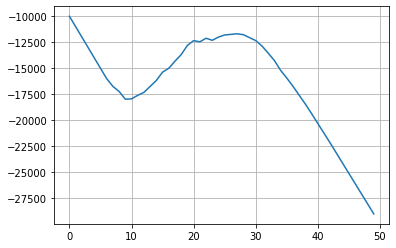

In [6]:
plt.plot(df['len_inventory'], df['mean_profit']);
plt.grid()

In [7]:
df = []
for word in words:
    row = {}
    for letter in word:
        if letter in row:
            row[letter] += 1
        else:
            row[letter] = 1
    df.append(row)

<AxesSubplot:>

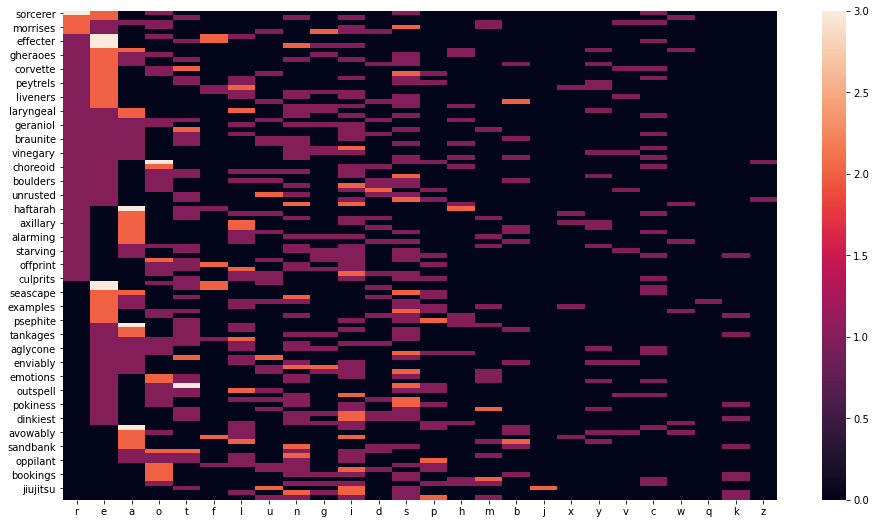

In [8]:
df = pd.DataFrame(df).fillna(0)
df.index = words
df = df[sorted(letter_counter, key=letter_counter.get, reverse=True)]
#df = df[list(string.ascii_lowercase)]
df = df.sort_values(sorted(letter_counter, key=letter_counter.get, reverse=True), ascending=False)

plt.figure(figsize=(16,9))
sns.heatmap(df)